# pyStrat Minimal Working Example

This Jupyter notebook is intended to provide a minimal working example (MWE) of core pyStrat functionality.

The reader is encouraged to read the docstrings for each function used for further information.

## Import Modules

In [1]:
# built in modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats

# pyStrat
from pyStrat import *

/Users/yuempark/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Import Data

Please note that, for now, this data is fabricated for instructional purposes, and does not accurately reflect real collected data.

In [3]:
data = read_data('data_template.csv')
data.head()

,THICKNESS,LITHOLOGY,GRAIN_SIZE,COLOUR,FEATURES,ASH_SAMPLE,ASH_HEIGHT,PM_SITE,PM_SAMPLE,PM_HEIGHT,CARB_SAMPLE,CARB_HEIGHT,CARB_d13C,CARB_d18O
0,14.8,si,sts,purple,NaN,1-53.1,911.7,17T001,A,934.60,s1,1.5,0.766,-0.814
1,0.2,tuff,tuff,tuff,NaN,1-148.0,1006.6,17T001,B,934.72,s2,5.6,1.737,0.893
2,1.5,si,sts,purple,NaN,1-148.9,1007.5,17T001,C,935.04,s3,12.0,1.882,0.732
3,4.8,cover,cover,cover,NaN,2-138.3,138.3,17T001,D,935.03,s4,21.4,1.398,-0.682
4,3.7,si,sts,purple,NaN,2-159.4,159.4,17T001,E,935.14,s5,25.5,1.661,-0.516


## Import Formatting

In [5]:
formatting = read_formatting('formatting_template.csv')

## Integrity Check

Check that values in the data are a subset of values in the formatting.

In [6]:
integrity_check(data, formatting)

Colour and width check passed.


## Plot

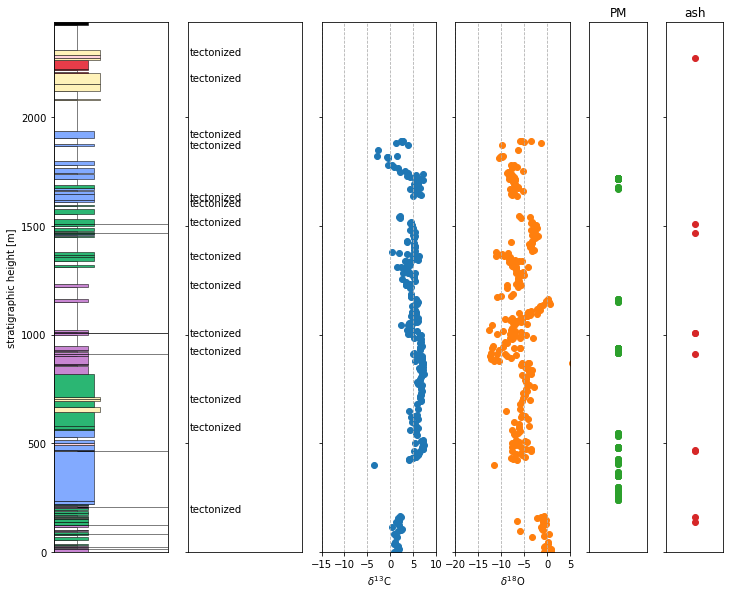

In [18]:
# set up the strat_ratio
strat_ratio = 0.004

# initiate the figure
fig, ax = initiate_figure(data, formatting, strat_ratio, 12, [1,1,1,1,0.5,0.5], linewidth=0.5)

# add data for d13C
add_data_axis(fig, ax, 2, data['CARB_d13C'], data['CARB_HEIGHT'], 'scatter', color='C0')
ax[2].set_xlabel('$\delta^{13}$C')
ax[2].set_xlim(-15,10)
ax[2].set_xticks([-15,-10,-5,0,5,10])
ax[2].xaxis.grid(ls='--')

# add data for d18O
add_data_axis(fig, ax, 3, data['CARB_d18O'], data['CARB_HEIGHT'], 'scatter', color='C1')
ax[3].set_xlabel('$\delta^{18}$O')
ax[3].set_xlim(-20,5)
ax[3].set_xticks([-20,-15,-10,-5,0,5])
ax[3].xaxis.grid(ls='--')

# add location of paleomag samples
add_data_axis(fig, ax, 4, np.zeros(len(data['PM_HEIGHT'])), data['PM_HEIGHT'], 'scatter', color='C2')
ax[4].set_xticks([])
ax[4].set_title('PM')

# add location of ash samples
add_data_axis(fig, ax, 5, np.zeros(len(data['ASH_HEIGHT'])), data['ASH_HEIGHT'], 'scatter', color='C3')
ax[5].set_xticks([])
ax[5].set_title('ash')

plt.show(fig)